# K Means Clustering

**Overview**

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct groups or clusters. It aims to group similar data points together based on their feature similarity. In this particular case, the model is being used to predict whether an individual's income is above or below a certain threshold based on a dataset containing information about various demographic and economic factors. 

> The dataset can be found [here](https://github.com/nagensk9/INDE577_ML/blob/main/Dataset/Classification/adult.csv). An official version of the dataset can also be found on Kaggle [here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset).

- The dataset consists of **48,789 observations and 15 variables**, all of which are numerical in nature. The variables in the dataset include information such as **age, workclass, education, marital status, occupation, and hours worked per week**, among others. These variables are used as input to the perceptron model, which then makes predictions about an individual's income based on these inputs.

- The model's performance is evaluated using several evaluation metrics, including accuracy, precision, recall, and F1 score. The confusion matrix is also used to evaluate the model's performance and identify any areas where it may be making errors.

In [1]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Set the dataset URL
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Classification/adult.csv"

In [3]:

def load_data(url):
    """
    Load data from given url.
    """
    df = pd.read_csv(url)
    return df

###Data Cleaning

In [4]:
def clean_data(df):
    """
    Clean the data by replacing missing values and transforming columns.
    """
    # Replace '?' with the mode in workclass, occupation, and native-country columns
    df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
    df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
    df['native-country'].replace('?', df['native-country'].mode()[0], inplace=True)
    # Convert income column to 0/1
    df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Map education categories to broader categories
    edu_mapping = {
        '1st-4th': 'HS',
        '5th-6th': 'HS',
        '7th-8th': 'HS',
        '9th': 'HS',
        '10th': 'HS',
        '11th': 'HS',
        '12th': 'HS',
        'HS-grad': 'Grad',
        'Assoc-acdm': 'college',
        'Assoc-voc': 'college',
        'Some-college': 'college',
        'Bachelors': 'Bachelors',
        'Masters': 'Masters',
        'Prof-school': 'Masters',
        'Doctorate': 'Doctorate',
    }

    df['education'] = df['education'].map(edu_mapping)

    # Map marital status categories to broader categories
    marital_mapping = {
        'Never-married': 'Never_married',
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Married-AF-spouse': 'Married',
        'Widowed': 'Widowed',
        'Divorced': 'Separated',
        'Separated': 'Separated',
    }

    df['marital-status'] = df['marital-status'].map(marital_mapping)

    # Create a LabelEncoder object
    le = LabelEncoder()

    # Apply label encoding to every column in the DataFrame
    df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

    return df


In [5]:
# Load the dataset
df = load_data(url)


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
# Clean the data
df = clean_data(df)

In [8]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('income', axis=1))

# Perform PCA to reduce the number of features to 4
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Fit K Means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca[:, :2])

# Create a meshgrid to plot the decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain the predicted labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


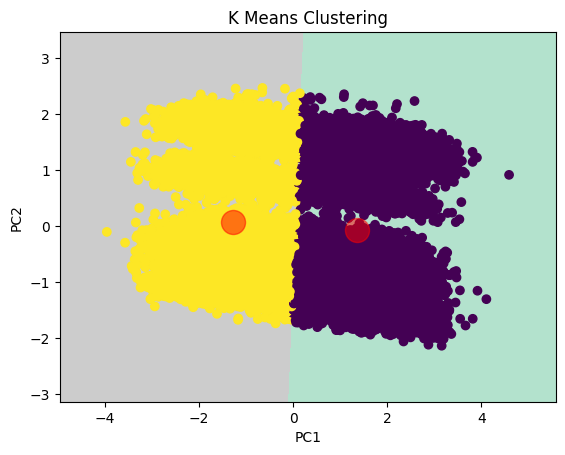

In [9]:
# Plot the decision boundary and the clusters
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K Means Clustering')
plt.show()

In [10]:

# Evaluate model
inertia = kmeans.inertia_
silhouette = silhouette_score(X, kmeans.labels_)

print("Inertia score: ", inertia)
print("Silhouette score: ", silhouette)


Inertia score:  93781.65544906062
Silhouette score:  0.13319227604835399


In [11]:
# Drop the target variable "income"
data = df.drop('income', axis=1)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


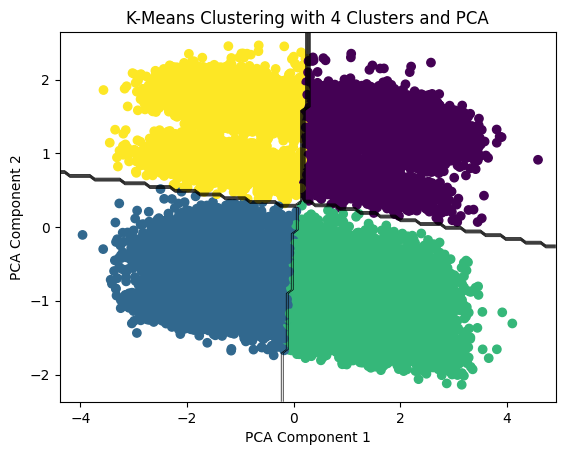

In [12]:
# Perform K-Means clustering using the first two PCA components
pca_data_2d = pca_data[:, :2]
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_data_2d)

# Plot the clusters and decision boundaries
plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1], c=kmeans.labels_, cmap='viridis')

# Decision boundaries
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

x_step = (xmax - xmin) / 100
y_step = (ymax - ymin) / 100

xx, yy = np.meshgrid(np.arange(xmin, xmax, x_step), np.arange(ymin, ymax, y_step))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with 4 Clusters and PCA')

plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Calculate inertia
inertia = kmeans.inertia_

# Calculate silhouette score
sil_score = silhouette_score(pca_data_2d, kmeans.labels_)

print("Inertia:", inertia)
print("Silhouette Score:", sil_score)

Inertia: 30663.30000816364
Silhouette Score: 0.5516706587265934


#### K-Means clustering with different values of K 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

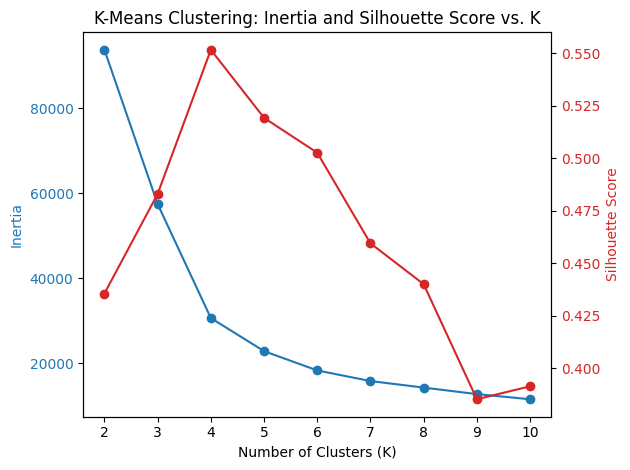

In [ ]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Test different values of K and calculate inertia and silhouette score for each K
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plot the results
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='tab:blue')
ax1.plot(k_values, inertia_values, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('K-Means Clustering: Inertia and Silhouette Score vs. K')
fig.tight_layout()

plt.show()

#### Conclusion


Given data with 4 clusters and 4 components obtained through Principal Component Analysis (PCA), the K-means clustering algorithm resulted in an inertia of 30663.30 and a silhouette score of 0.55.

The inertia value reflects the sum of squared distances between each data point and its nearest centroid. In this case, the relatively high inertia value suggests that the data points within each cluster are widely spread and do not form tight clusters. It indicates that the clustering may not be very effective in capturing the underlying structure of the data.

The silhouette score measures the quality of clustering based on the cohesion and separation of the clusters. A score closer to 1 indicates well-separated clusters, while a score close to -1 suggests overlapping clusters. The obtained silhouette score of 0.5516706587265934 suggests a moderate level of separation and cohesion among the clusters. It indicates that the clustering has some degree of effectiveness in grouping similar data points together.